# ON MY COMPUTER 

<br><br><br>

# Name:  Tom Bresee

### University of Michigan

<br><br><br>

In [1]:
version = "v1.6.083120"

<br><br><br>

### _Side Comments:_

* One common pattern within machine learning is to use linear models trained on nonlinear functions of the data. This approach maintains the generally fast performance of linear methods, while allowing them to fit a much wider range of data.
* Polynomial features are those features created by raising existing features to an exponent.



<br><br>

# Assignment 2: Regression and Classification

In this assignment we will build several regression and classification models and learn how model complexity relates to generalization performance.

First, run the following cell to generate and plot the data points we will use throughout the assignment. 

The independent variable $x$ consists of 40 evenly spaced points from the interval $[0, 20]$ and the dependent variable $y = 0.05x^3 - x^2 - x + 10 \epsilon$ is a function of $x$ where $\epsilon \sim \mathcal{N}(0, 1)$ represents the standard Gaussian noise. 

<br>

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

# Suppress all warnings
import warnings
warnings.filterwarnings('ignore')

np.random.seed(0)
n = 40
x = np.linspace(0, 20, n)  # x is drawn from a fixed range
y = x ** 3 / 20 - x ** 2 - x + 10 * np.random.randn(n)


# Create the training and testing sets and their targets
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [3]:

#-----------------------------------------------------

from sklearn.model_selection import train_test_split

#-----------------------------------------------------


In [4]:

x 


array([ 0.        ,  0.51282051,  1.02564103,  1.53846154,  2.05128205,
        2.56410256,  3.07692308,  3.58974359,  4.1025641 ,  4.61538462,
        5.12820513,  5.64102564,  6.15384615,  6.66666667,  7.17948718,
        7.69230769,  8.20512821,  8.71794872,  9.23076923,  9.74358974,
       10.25641026, 10.76923077, 11.28205128, 11.79487179, 12.30769231,
       12.82051282, 13.33333333, 13.84615385, 14.35897436, 14.87179487,
       15.38461538, 15.8974359 , 16.41025641, 16.92307692, 17.43589744,
       17.94871795, 18.46153846, 18.97435897, 19.48717949, 20.        ])

In [5]:

y


array([ 17.64052346,   3.23250989,   7.76374492,  18.685673  ,
        12.84810472, -18.06860307,  -1.58696289, -15.67665642,
       -18.51326541, -16.89538048, -23.24305524, -13.94425898,
       -24.76103832, -35.07954613, -35.7825447 , -40.76885527,
       -32.96831091, -53.64280973, -51.98083869, -66.97046565,
       -87.03464369, -57.76058237, -58.12075543, -76.29098381,
       -47.87141143, -86.36718715, -72.13500742, -74.70752353,
       -57.18455635, -56.88853607, -68.4550774 , -63.95754775,
       -73.62338589, -80.79112354, -59.89072654, -49.4269181 ,
       -32.37620107, -25.41344759, -33.09763136, -23.02302751])

In [6]:

X_train


array([13.84615385, 17.94871795, 18.97435897,  1.02564103, 20.        ,
       15.38461538, 17.43589744,  8.20512821, 18.46153846,  4.1025641 ,
        6.66666667,  2.56410256,  8.71794872,  7.17948718, 16.92307692,
        3.58974359, 16.41025641,  0.51282051, 13.33333333,  6.15384615,
       15.8974359 , 12.30769231,  3.07692308, 11.79487179, 10.76923077,
        9.74358974,  4.61538462, 19.48717949,  1.53846154,  0.        ])

In [7]:

y_train


array([-74.70752353, -49.4269181 , -25.41344759,   7.76374492,
       -23.02302751, -68.4550774 , -59.89072654, -32.96831091,
       -32.37620107, -18.51326541, -35.07954613, -18.06860307,
       -53.64280973, -35.7825447 , -80.79112354, -15.67665642,
       -73.62338589,   3.23250989, -72.13500742, -24.76103832,
       -63.95754775, -47.87141143,  -1.58696289, -76.29098381,
       -57.76058237, -66.97046565, -16.89538048, -33.09763136,
        18.685673  ,  17.64052346])

<br>

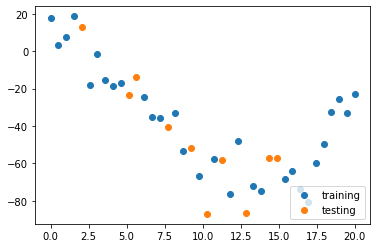

In [8]:

def data_scatter():
    
    """
    This function helps you visualize the training and testing sets by drawing a scatter plot of the data points.
    Feel free to change the function in any ways to create your own visuals. 
    """
    
    plt.figure()
    plt.scatter(X_train, y_train, label='training')
    plt.scatter(X_test, y_test, label='testing')
    plt.legend(loc=4)

    
# Remember to comment it out before submitting the notebook
data_scatter()



<br><br><br>

### Question 1. (15 pts)

From the data generation process we can see that a *linear* function is not sufficient to accurately describe the relationship between $x$ and $y$. What we really need is a *non-linear* regression that relates $x$ and $y$ in a non-linear way, which in our case we conjecture $y$ is a *polynomial* function of various degrees of $x$:

\begin{equation*}
y = a_{0} + a_{1}x + a_{2}x^{2} + \cdots + a_{n}x^{n}
\end{equation*}

where $a_{0}, a_{1}, \cdots, a_{n}$ are the coefficients we want to find. Notice that although $y$ is not a linear function of $x$, it is linear in each power of $x$. That means we can still run linear regression, but now on powers of $x$ instead of the zeroth and the first power of $x$ only. To do so we need to create various powers of $x$ out of the data we have now using the [`PolynomialFeatures`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn-preprocessing-polynomialfeatures) class from `scikit-learn`. 

Write a function that fits a polynomial [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) model on the *training data* `X_train` for degrees 1, 3, 7, 11, 15, 21, respectively. To do this, first use `PolynomialFeatures` to transform the original data so that it adds new additional polynomial features. With this expanded feature set, fit a `LinearRegression` model. For each model, generate predictions for 100 evenly spaced points on the interval [0, 20] and store the results in a numpy array, whose the first row stores the predictions from the model of degree 1, the second row stores the predictions from the model of degree 3 and so on. 

*This function should return a numpy array of the shape `(6, 100)`.*

In [16]:
# Note: the values should be horizontal (6 total) of 100 values each

<br>

In [22]:

# TEMP:

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures

degs = (1, 3, 7, 11, 15, 21)  # this will be useful later


def answer_one():
    
    preds = None
    
    spread = np.linspace(0,20, num=100)

    # --- my code here ---
    
    # We will need to transform the original input data to add polynomial features 
    # up to degree 21 (degrees 1,3,7,11,15,21)
    
    poly = PolynomialFeatures(degree=3)
    
    x_poly = poly.fit_transform(x.reshape(-1,1))
    
    # print(x_poly)
    
    X_train, X_test, y_train, y_test = train_test_split(x_poly, y, random_state=0)

    linreg = LinearRegression().fit(X_train, y_train)


    print('(poly deg 3) linear model coeff (w):\n{}'.format(linreg.coef_))


    print('(poly deg 3) linear model intercept (b): {:.3f}'.format(linreg.intercept_))


    print('(poly deg 3) R-squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))
 

    print('(poly deg 3) R-squared score (test): {:.3f}\n'.format(linreg.score(X_test, y_test)))


    X_predict_input = np.linspace(0,20, num=100)
    
    # print(X_predict_input)
    
    first_preds = linreg.predict(X_predict_input)

    print(first_preds)
    
    # return preds
    

answer_one()




# --- print(x_poly) ---
#     
# [[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
#  [1.00000000e+00 5.12820513e-01 2.62984878e-01 1.34864040e-01]
#  [1.00000000e+00 1.02564103e+00 1.05193951e+00 1.07891232e+00]
#  [1.00000000e+00 1.53846154e+00 2.36686391e+00 3.64132909e+00]
#  [1.00000000e+00 2.05128205e+00 4.20775805e+00 8.63129857e+00]
#  [1.00000000e+00 2.56410256e+00 6.57462196e+00 1.68580050e+01]
#  [1.00000000e+00 3.07692308e+00 9.46745562e+00 2.91306327e+01]
#  [1.00000000e+00 3.58974359e+00 1.28862590e+01 4.62583658e+01]
#  [1.00000000e+00 4.10256410e+00 1.68310322e+01 6.90503886e+01]
#  [1.00000000e+00 4.61538462e+00 2.13017751e+01 9.83158853e+01]
#  [1.00000000e+00 5.12820513e+00 2.62984878e+01 1.34864040e+02]
#  [1.00000000e+00 5.64102564e+00 3.18211703e+01 1.79504037e+02]
#  [1.00000000e+00 6.15384615e+00 3.78698225e+01 2.33045061e+02]
#  [1.00000000e+00 6.66666667e+00 4.44444444e+01 2.96296296e+02]
#  [1.00000000e+00 7.17948718e+00 5.15450362e+01 3.70066926e+02]
#  [1.00000000e+00 7.69230769e+00 5.91715976e+01 4.55166136e+02]
#  [1.00000000e+00 8.20512821e+00 6.73241289e+01 5.52403109e+02]
#  [1.00000000e+00 8.71794872e+00 7.60026298e+01 6.62587029e+02]
#  [1.00000000e+00 9.23076923e+00 8.52071006e+01 7.86527082e+02]
#  [1.00000000e+00 9.74358974e+00 9.49375411e+01 9.25032452e+02]
#  [1.00000000e+00 1.02564103e+01 1.05193951e+02 1.07891232e+03]
#  [1.00000000e+00 1.07692308e+01 1.15976331e+02 1.24897588e+03]
#  [1.00000000e+00 1.12820513e+01 1.27284681e+02 1.43603230e+03]
#  [1.00000000e+00 1.17948718e+01 1.39119001e+02 1.64089078e+03]
#  [1.00000000e+00 1.23076923e+01 1.51479290e+02 1.86436049e+03]
#  [1.00000000e+00 1.28205128e+01 1.64365549e+02 2.10725063e+03]
#  [1.00000000e+00 1.33333333e+01 1.77777778e+02 2.37037037e+03]
#  [1.00000000e+00 1.38461538e+01 1.91715976e+02 2.65452890e+03]
#  [1.00000000e+00 1.43589744e+01 2.06180145e+02 2.96053541e+03]
#  [1.00000000e+00 1.48717949e+01 2.21170283e+02 3.28919908e+03]
#  [1.00000000e+00 1.53846154e+01 2.36686391e+02 3.64132909e+03]
#  [1.00000000e+00 1.58974359e+01 2.52728468e+02 4.01773462e+03]
#  [1.00000000e+00 1.64102564e+01 2.69296515e+02 4.41922487e+03]
#  [1.00000000e+00 1.69230769e+01 2.86390533e+02 4.84660901e+03]
#  [1.00000000e+00 1.74358974e+01 3.04010519e+02 5.30069624e+03]
#  [1.00000000e+00 1.79487179e+01 3.22156476e+02 5.78229572e+03]
#  [1.00000000e+00 1.84615385e+01 3.40828402e+02 6.29221666e+03]
#  [1.00000000e+00 1.89743590e+01 3.60026298e+02 6.83126823e+03]
#  [1.00000000e+00 1.94871795e+01 3.79750164e+02 7.40025961e+03]
#  [1.00000000e+00 2.00000000e+01 4.00000000e+02 8.00000000e+03]]



(poly deg 3) linear model coeff (w):
[ 0.         -3.20680908 -0.84053006  0.0460391 ]
(poly deg 3) linear model intercept (b): 11.359
(poly deg 3) R-squared score (training): 0.904
(poly deg 3) R-squared score (test): 0.809



TypeError: 'tuple' object is not callable

In [23]:

# # FINAL 

# from sklearn.linear_model import LinearRegression

# from sklearn.preprocessing import PolynomialFeatures

# degs = (1, 3, 7, 11, 15, 21)  # this will be useful later



# def answer_one():
    
#     preds = None

#     # --- my code here ---
    
#     # We will need to transform the original input data to add polynomial features 
#     # up to degree 21 (degrees 1,3,7,11,15,21)
    
#     poly = PolynomialFeatures(degree=3)
    
#     X_poly = poly.fit_transform(X)
    
#     X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=0)

#     linreg = LinearRegression().fit(X_train, y_train)

    

#     print('(poly deg 3) linear model coeff (w):\n{}'
#      .format(linreg.coef_))


#     print('(poly deg 3) linear model intercept (b): {:.3f}'
#      .format(linreg.intercept_))


#     print('(poly deg 3) R-squared score (training): {:.3f}'
#      .format(linreg.score(X_train, y_train)))


#     print('(poly deg 3) R-squared score (test): {:.3f}\n'
#      .format(linreg.score(X_test, y_test)))


#     return preds


<br>

In [10]:
# Autograder tests

stu_ans = answer_one()

assert isinstance(stu_ans, np.ndarray), "Q1: Your function should return a np.ndarray. "
assert stu_ans.shape == (6, 100), "Q1: Your np.ndarray is of an incorrect shape. "

del stu_ans

(poly deg 3) linear model coeff (w):
[ 0.         -3.20680908 -0.84053006  0.0460391 ]
(poly deg 3) linear model intercept (b): 11.359
(poly deg 3) R-squared score (training): 0.904
(poly deg 3) R-squared score (test): 0.809

[ 0.          0.2020202   0.4040404   0.60606061  0.80808081  1.01010101
  1.21212121  1.41414141  1.61616162  1.81818182  2.02020202  2.22222222
  2.42424242  2.62626263  2.82828283  3.03030303  3.23232323  3.43434343
  3.63636364  3.83838384  4.04040404  4.24242424  4.44444444  4.64646465
  4.84848485  5.05050505  5.25252525  5.45454545  5.65656566  5.85858586
  6.06060606  6.26262626  6.46464646  6.66666667  6.86868687  7.07070707
  7.27272727  7.47474747  7.67676768  7.87878788  8.08080808  8.28282828
  8.48484848  8.68686869  8.88888889  9.09090909  9.29292929  9.49494949
  9.6969697   9.8989899  10.1010101  10.3030303  10.50505051 10.70707071
 10.90909091 11.11111111 11.31313131 11.51515152 11.71717172 11.91919192
 12.12121212 12.32323232 12.52525253 12.7272

ValueError: Expected 2D array, got 1D array instead:
array=[ 0.          0.2020202   0.4040404   0.60606061  0.80808081  1.01010101
  1.21212121  1.41414141  1.61616162  1.81818182  2.02020202  2.22222222
  2.42424242  2.62626263  2.82828283  3.03030303  3.23232323  3.43434343
  3.63636364  3.83838384  4.04040404  4.24242424  4.44444444  4.64646465
  4.84848485  5.05050505  5.25252525  5.45454545  5.65656566  5.85858586
  6.06060606  6.26262626  6.46464646  6.66666667  6.86868687  7.07070707
  7.27272727  7.47474747  7.67676768  7.87878788  8.08080808  8.28282828
  8.48484848  8.68686869  8.88888889  9.09090909  9.29292929  9.49494949
  9.6969697   9.8989899  10.1010101  10.3030303  10.50505051 10.70707071
 10.90909091 11.11111111 11.31313131 11.51515152 11.71717172 11.91919192
 12.12121212 12.32323232 12.52525253 12.72727273 12.92929293 13.13131313
 13.33333333 13.53535354 13.73737374 13.93939394 14.14141414 14.34343434
 14.54545455 14.74747475 14.94949495 15.15151515 15.35353535 15.55555556
 15.75757576 15.95959596 16.16161616 16.36363636 16.56565657 16.76767677
 16.96969697 17.17171717 17.37373737 17.57575758 17.77777778 17.97979798
 18.18181818 18.38383838 18.58585859 18.78787879 18.98989899 19.19191919
 19.39393939 19.5959596  19.7979798  20.        ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [11]:

# Optional: Now let's plot the polynomials we learned from the training data, along with the training and the testing data
# Feel free to change this function in any way to create your own visuals. 

degs = (1, 3, 7, 11, 15, 21)

def plot_one(predictions):
    plt.figure(figsize=(10, 5))
    plt.plot(X_train, y_train, 'o', label='training', markersize=10)
    plt.plot(X_test, y_test, 'o', label='testing', markersize=10)
    for i, deg in enumerate(degs):
        plt.plot(np.linspace(0, 20, 100), predictions[i], alpha=0.8, lw=2, label=f"degree={deg}")
    plt.legend(loc=4)

# Remember to comment it out before submitting the notebook
plot_one(answer_one())


(poly deg 3) linear model coeff (w):
[ 0.         -3.20680908 -0.84053006  0.0460391 ]
(poly deg 3) linear model intercept (b): 11.359
(poly deg 3) R-squared score (training): 0.904
(poly deg 3) R-squared score (test): 0.809

[ 0.          0.2020202   0.4040404   0.60606061  0.80808081  1.01010101
  1.21212121  1.41414141  1.61616162  1.81818182  2.02020202  2.22222222
  2.42424242  2.62626263  2.82828283  3.03030303  3.23232323  3.43434343
  3.63636364  3.83838384  4.04040404  4.24242424  4.44444444  4.64646465
  4.84848485  5.05050505  5.25252525  5.45454545  5.65656566  5.85858586
  6.06060606  6.26262626  6.46464646  6.66666667  6.86868687  7.07070707
  7.27272727  7.47474747  7.67676768  7.87878788  8.08080808  8.28282828
  8.48484848  8.68686869  8.88888889  9.09090909  9.29292929  9.49494949
  9.6969697   9.8989899  10.1010101  10.3030303  10.50505051 10.70707071
 10.90909091 11.11111111 11.31313131 11.51515152 11.71717172 11.91919192
 12.12121212 12.32323232 12.52525253 12.7272

ValueError: Expected 2D array, got 1D array instead:
array=[ 0.          0.2020202   0.4040404   0.60606061  0.80808081  1.01010101
  1.21212121  1.41414141  1.61616162  1.81818182  2.02020202  2.22222222
  2.42424242  2.62626263  2.82828283  3.03030303  3.23232323  3.43434343
  3.63636364  3.83838384  4.04040404  4.24242424  4.44444444  4.64646465
  4.84848485  5.05050505  5.25252525  5.45454545  5.65656566  5.85858586
  6.06060606  6.26262626  6.46464646  6.66666667  6.86868687  7.07070707
  7.27272727  7.47474747  7.67676768  7.87878788  8.08080808  8.28282828
  8.48484848  8.68686869  8.88888889  9.09090909  9.29292929  9.49494949
  9.6969697   9.8989899  10.1010101  10.3030303  10.50505051 10.70707071
 10.90909091 11.11111111 11.31313131 11.51515152 11.71717172 11.91919192
 12.12121212 12.32323232 12.52525253 12.72727273 12.92929293 13.13131313
 13.33333333 13.53535354 13.73737374 13.93939394 14.14141414 14.34343434
 14.54545455 14.74747475 14.94949495 15.15151515 15.35353535 15.55555556
 15.75757576 15.95959596 16.16161616 16.36363636 16.56565657 16.76767677
 16.96969697 17.17171717 17.37373737 17.57575758 17.77777778 17.97979798
 18.18181818 18.38383838 18.58585859 18.78787879 18.98989899 19.19191919
 19.39393939 19.5959596  19.7979798  20.        ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

<br><br><br>

### Question 2. (15 pts)

Write a function that fits a polynomial LinearRegression model on the training data `X_train` for degrees = (1, 3, 7, 11, 15, 21). For each model compute the $R^2$ (coefficient of determination) regression score on the training data as well as the the testing data. 

*This function should return a tuple of lists `(r2_train, r2_test)`, where `r2_train` contains the $R^{2}$ scores on the training data and the other contains the $R^{2}$ scores on the testing data.*

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics.regression import r2_score

degs = (1, 3, 7, 11, 15, 21)  # this will be useful later

def answer_two():
    r2_train, r2_test = None, None
    
    # YOUR CODE HERE
    raise NotImplementedError()
    
    return r2_train, r2_test

In [13]:
# Autograder tests

stu_ans = answer_two()
assert isinstance(stu_ans, tuple), "Q2: Your function should return a tuple. "
assert len(stu_ans) == 2, "Q2: The tuple returned should be of length 2. "
assert isinstance(stu_ans[0], list) and isinstance(stu_ans[1], list), "Q2: The tuple should contain only lists. "

del stu_ans

NotImplementedError: 

<br><br><br>

### Question 3. (5 pts)

Fit a k-NN regression model with the training data and return the $R^{2}$ value on the testing data. Use the default hyper-parameters. 

*This function should return a single `float` number.*

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

def answer_three():
    r2 = None

    # YOUR CODE HERE
    raise NotImplementedError()

    return r2

In [15]:
# Autograder tests

stu_ans = answer_three()

assert isinstance(stu_ans, float), "Q3: Your function should return a single float number. "

del stu_ans

NotImplementedError: 

<br><br><br>

### Question 4a.  (5 pts)

Based on the $R^2$ scores from Question 2, which degree of the polynomial causes the model to be
 - underfitting; 
 - overfitting; or
 - achieving good generalisation performance? 

Hint: Try to plot the degrees of the polynomial against the $R^2$ scores to visualise their relationship. 

*This is a manually graded question. Write down your answer in the cell below following the order `(Underfitting, Overfitting, Good_Generalisation)`, where you will replace the words with the actual degrees, for example, (1, 2, 3). There might be multiple correct answers, but you only need to write down ONE.* 

In [ ]:
# Your answer goes here

# YOUR CODE HERE
raise NotImplementedError()

<br><br><br>

### Question 4b. (15 pts) 

Training models on high-degree polynomial features can result in overly complex models that overfit the training data, so we often add some regularization to constrain the model complexity as we saw in Ridge and Lasso regression.

For this question, you will be comparing the non-regularized `LinearRegression` model (with the default hyper-parameters) that you built for Question 1, to a new regularised Lasso Regression model (with hyper-parameters `alpha=0.01`, `max_iter=10000`) --- on polynomial features of varying degrees, so you can see the difference with the polynomials that were fit in Question 1.

Your function should return predictions for the regularized model in the same format that you used for question 1: namely, you generate predictions for 100 evenly spaced points on the interval [0, 20] and store the results in a numpy array, whose the first row stores the predictions from the model of degree 1, the second row stores the predictions from the model of degree 3 and so on.

*This function should return a numpy array of the shape `(6, 100)`.*

Once you have successful generated these predictions, plot them using the provided function and compare with the polynomial fit in Question 1.

In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.metrics.regression import r2_score

degs = (1, 3, 7, 11, 15, 21)
def answer_four_b():
    preds = []
    
    # YOUR CODE HERE
    raise NotImplementedError()

    return preds

In [31]:
# Autograder tests

stu_ans = answer_four_b()

assert isinstance(stu_ans, np.ndarray), "Q4b: Your function should return a np.ndarray. "
assert stu_ans.shape == (6, 100), "Q4b: Your np.ndarray is of an incorrect shape: it should be (6, 100)."

del stu_ans

NotImplementedError: 

In [ ]:
# Remember to comment it out before submitting the notebook
# plot_one(answer_four_b())

<br><br><br>

### Question 4c. (15 points) 

Return the $R^2$ score for the Lasso model relative to a test set generated from the true underlying model.  Compute this test set by computing the true underlying function `t^3/20 - t^2 - t` for each of 100 evenly spaced points on the interval [0, 20] (the same as you've used in previous questions).  For each degree (1, 3, 7, 11, 15, 21), compute the $R^2$ score and return the polynomial degree that gives the best fit on this test set. Your function should return an integer, which should be in the set (1,3,7,11,15,21).  Does the optimal polynomial degree match the true polynomial degree?

In [ ]:
degs = (1, 3, 7, 11, 15, 21)

def answer_four_c():
    best_deg = []
    
    # YOUR CODE HERE
    raise NotImplementedError()

    return best_deg

In [ ]:
stu_ans = answer_four_c()

assert isinstance(stu_ans, int), "Q4c: Your function should return an integer. "
del stu_ans

<br><br><br>

### Question 5. Comparison of results (5 points)

Compare the test set $R^2$ results of the Lasso regression and polynomial regression above. Did the regularization have the desired effect?  Why or why not?

In [ ]:
# Your answer goes here

# YOUR CODE HERE
raise NotImplementedError()

<br><br><br>

### Question 6. Ridge vs Lasso regularization (5 points)

We didn't happen to try Ridge regression on this example - but it also does regularization. Would you expect Ridge regression to consistently outperform Lasso regression on this particular regression task? Why or why not?

In [ ]:
# Your answer goes here

# YOUR CODE HERE
raise NotImplementedError()

<br><br><br>

### Question 7.  (15 points)  Applying a SVC classifier to the Wisconsin dataset

We're going to return to the Wisconsin breast cancer dataset to apply our newly learned Support Vector classifier  (`SVC`).

For this question, we're also going to use the `validation_curve` function in `sklearn.model_selection` to determine training and test scores for the Support Vector Classifier with varying parameter values.

Create an `SVC` with default parameters (i.e. `kernel='rbf', C=1`) and `random_state=0`. Recall that the kernel width of the RBF kernel is controlled using the `gamma` parameter.  Explore the effect of `gamma` on classifier accuracy by using the `validation_curve` function to find the training and test scores for 6 values of `gamma` from `1e-7` to `1e-2` (i.e. `np.logspace(-7,-1,6)`, or more precisely `[1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03, 1.e-02]`).

For each level of `gamma`, `validation_curve` will fit 3 models on different subsets of the data, returning two 6x3 (6 levels of gamma x 3 fits per level) arrays of the scores for the training and test sets. 

Find the mean score across the three models for each level of `gamma` for both arrays, creating two arrays of length 6, and return a tuple with the two arrays.

e.g.

if one of your array of scores is

    array([[ 0.5,  0.4,  0.6],
           [ 0.7,  0.8,  0.7],
           [ 0.9,  0.8,  0.8],
           [ 0.8,  0.7,  0.8],
           [ 0.7,  0.6,  0.6],
           [ 0.4,  0.6,  0.5]])
       
it should then become

    array([ 0.5,  0.73333333,  0.83333333,  0.76666667,  0.63333333, 0.5])

*This function should return a tuple of numpy arrays `(training_scores, test_scores)` where each array in the tuple has shape `(6,)`.*

Here's the preliminary code to load the dataset and prepare the train/test split.

In [ ]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

data      = np.hstack([cancer["data"], cancer["target"].reshape(-1, 1)])
col_names = np.hstack([cancer["feature_names"], ["target"]])
cancer_df = pd.DataFrame(data, columns=col_names)

X_cancer, y_cancer = cancer_df.iloc[:, :-1], cancer_df.iloc[:, -1]

X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(X_cancer, y_cancer, random_state=0)

In [ ]:
def answer_seven():
    results = None
    
    # YOUR CODE HERE
    raise NotImplementedError()
    return results

In [ ]:
# Autograder tests

stu_ans = answer_seven()

assert isinstance(stu_ans, tuple), "Q7: You should return a tuple (of two arrays)"
assert stu_ans[0].shape == (6, ), "Q7: Please check the shape of your first returned array: it should be (6,)."
assert stu_ans[1].shape == (6, ), "Q7: Please check the shape of your second returned array: it should be (6,)."

del stu_ans


<br><br><br>

### Question 8. (5 points)  

Based on the scores from question 7, what gamma value corresponds to a model that is underfitting? What gamma value corresponds to a model that is overfitting? What choice of gamma would provide a model with good generalization performance on this dataset?

(Hint: Try plotting the scores from question 7 to visualize the relationship. Code is provided below.)

This function should return a tuple with the gamma values in this order: (Underfitting, Overfitting, Good_Generalization)
You must enter these values in the format 1e-N, where N is the exponent, and the gamma value must be one of the values in the list `[1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2]`.  Some answers have more than one value that will be accepted as correct.

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
a,b = answer_seven()

# Remember to comment it out before submitting the notebook
# uncomment to plot
# x = np.arange(-7, -1, 1)
# plt.figure()
# plt.plot(x, a)
# plt.plot(x, b)
# plt.xticks(x)
# plt.xlabel('log scale: gamma parameter')
# plt.show()

def answer_eight():
    result = None
    # YOUR CODE HERE
    raise NotImplementedError()
    return result
    

NameError: name 'answer_seven' is not defined

In [ ]:
# Autograder tests

stu_ans = answer_eight()

assert isinstance(stu_ans, tuple), "Q8: You should return a tuple."
assert len(stu_ans) == 3, "Q8: Your tuple must have 3 elements."

del stu_ans